In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time

In [8]:
eps = 1e-5

def load_image_and_split_channels(image_path):
    # Step 1: Load the image
    image = Image.open(image_path).convert('RGB')
    
    # Step 2: Convert the image into a NumPy array
    image_np = np.array(image)
    
    # Step 3: Extract the Red, Green, and Blue channels
    red_channel = image_np[:, :, 0].astype(np.float64) 
    green_channel = image_np[:, :, 1].astype(np.float64) 
    blue_channel = image_np[:, :, 2].astype(np.float64) 
    
    return image_np, red_channel, green_channel, blue_channel

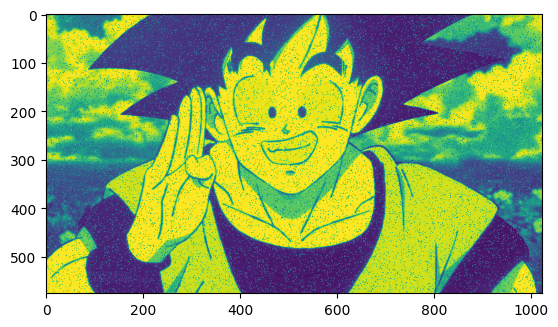

In [9]:
img_array,Y_1, Y_2, Y_3 = load_image_and_split_channels("son_goku.png")
m,n = Y_1.shape
plt.imshow(Y_1)

In [10]:
def gradient_f_l(X,Y_l,lmd):

    R = np.zeros((m, n))
    R[1,2:n-1] = 6 * X[1, 2: n - 1] - 2 * (X[2, 2:n-1] + X[1, 3:n] + X[0,2:n-1])
    R[2:m-1, 1] = 6 * X[2:m-1, 1] - 2 * (X[3:m, 1] + X[2:m-1, 2] + X[1:m-2,1])

    R[1,1] = 4 * X[1,1] - 4 * (X[2,1]+X[1,2])

    i = 2 # -> m - 1
    j = 2 # -> n - 1 
    
    R[i:m-1, j:n-1] = 8 * X[i:m-1, j:n-1] - 2 * (X[i+1:m, j:n-1] + X[i-1:m-2, j:n-1] + X[i:m-1, j+1:n] + X[i:m-1, j-1:n-2])

    i = m - 1
    R[i, 1:n-1] = 2 * (X[i, 1:n - 1] - X[i - 1, 1:n-1])

    j = n - 1
    R[1:m-1, j] = 2 * (X[1:m-1, j] - X[1:m-1, j - 1])

    g = X-Y_l + lmd*R

    return g

In [17]:
def projected_gradient_method(Y_l,lmd):    
    X_k = np.copy(Y_l)
    criterion = True
    L = 1+8*lmd
    iter = 0
    while(criterion):
        g = gradient_f_l(X_k,Y_l,lmd)
        Z = X_k - g / L
        X_next = np.clip(Z,0,255)
        G_L = L*np.linalg.norm(X_k - X_next,'fro')
        if iter % 400 == 0:
            print("Iter = ",iter)
            print("G_L = ",G_L)
        if G_L <= eps:
            criterion = False
        X_k = X_next
        iter+=1
    return X_next


In [18]:
def mse_comp(original, denoised):
    return np.mean((original.astype(np.float32) - denoised.astype(np.float32)) ** 2)

In [19]:
def compute_optimization(lmd,times,results):
    
    start_time = time.time() 

    L = 1 + 8*lmd 
    print("Lipschitz constant = ", L)   
    print("Optimizing red")
    X_1_opt = projected_gradient_method(Y_1,lmd)
    print("Optimizing green")
    X_2_opt = projected_gradient_method(Y_2,lmd)
    print("Optimizing blue")
    X_3_opt = projected_gradient_method(Y_3,lmd)
    print("Optimization finalized \n")
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

    denoised_array = np.stack([X_1_opt, X_2_opt, X_3_opt], axis=-1)
    denoised_array = denoised_array.astype(np.uint8) # Convert to uint8 to avoid the type error

    # Compute quality metrics
    mse_err = mse_comp(img_array, denoised_array)
    results.append((lmd, mse_err))

    fig, axes = plt.subplots(2, 1, figsize=(6, 10))  # 2 rows, 1 column
    fig.suptitle(f'Projected Gradient Method\n(lambda = {lmd})', fontsize=16)

    # Plot the noised image on top
    axes[0].imshow(img_array)
    axes[0].axis('off')  # Turn off the axis labels
    axes[0].set_title('Noised Image')

    # Plot the denoised image on the bottom
    axes[1].imshow(denoised_array)
    axes[1].axis('off')  # Turn off the axis labels
    axes[1].set_title('Denoised Image')

    plt.subplots_adjust(hspace=0.001)
    plot_filename = f"comparison_plot_lambda_{lmd}.png"
    plt.savefig(plot_filename)
    

In [20]:
results = []
times = []
lmds = [5,20,60,100]

Lipschitz constant =  41
Optimizing red
Iter =  0
G_L =  1220087.9406010062
Iter =  400
G_L =  2.349561180208924
Iter =  800
G_L =  8.529976164862916e-05
Optimizing green
Iter =  0
G_L =  1149937.8096353759
Iter =  400
G_L =  2.0738547174801294
Iter =  800
G_L =  7.654754859758535e-05
Optimizing blue
Iter =  0
G_L =  1195314.8683991195
Iter =  400
G_L =  2.095661659017758
Iter =  800
G_L =  7.421630112113978e-05
Optimization finalized 



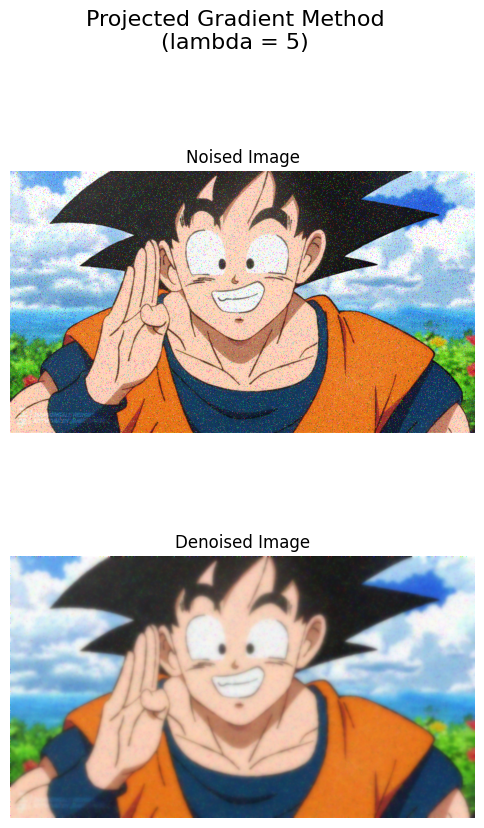

In [21]:
compute_optimization(5,times,results)

Lipschitz constant =  161
Optimizing red
Iter =  0
G_L =  4880351.762403977
Iter =  400
G_L =  15143.824091736702
Iter =  800
G_L =  885.901465148034
Iter =  1200
G_L =  59.11153264432809
Iter =  1600
G_L =  4.170619960652522
Iter =  2000
G_L =  0.3039084007665535
Iter =  2400
G_L =  0.022628577190747835
Iter =  2800
G_L =  0.00171131875025481
Iter =  3200
G_L =  0.00013094515909745002
Iter =  3600
G_L =  1.0110745003959833e-05
Optimizing green
Iter =  0
G_L =  4599750.940832406
Iter =  400
G_L =  13366.790047652923
Iter =  800
G_L =  795.0031422251327
Iter =  1200
G_L =  53.91735710091954
Iter =  1600
G_L =  3.8472766492798245
Iter =  2000
G_L =  0.2823197446296136
Iter =  2400
G_L =  0.021095041461236887
Iter =  2800
G_L =  0.0015963798404210131
Iter =  3200
G_L =  0.00012195078549992033
Optimizing blue
Iter =  0
G_L =  4781259.469925852
Iter =  400
G_L =  13507.344158347947
Iter =  800
G_L =  770.7914756147786
Iter =  1200
G_L =  51.374584075964805
Iter =  1600
G_L =  3.651703119612

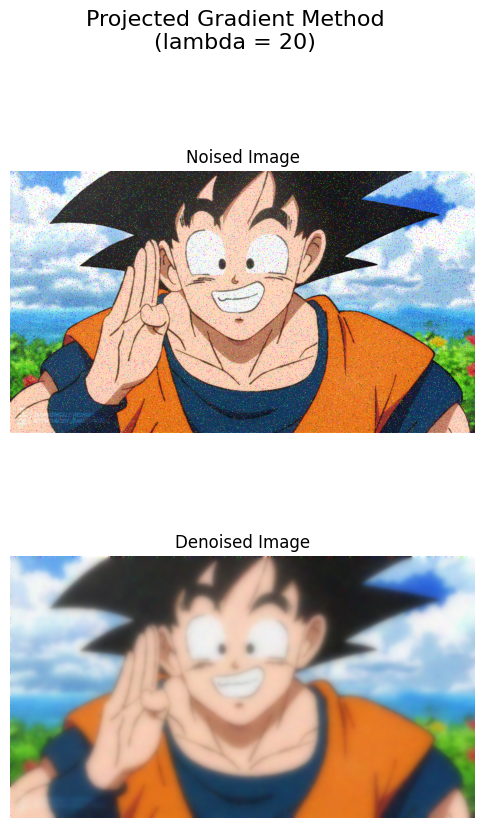

In [22]:
compute_optimization(20,times,results)

Lipschitz constant =  481
Optimizing red
Iter =  0
G_L =  14641055.287212046
Iter =  400
G_L =  238879.32444787558
Iter =  800
G_L =  73476.79033600357
Iter =  1200
G_L =  25778.564395703223
Iter =  1600
G_L =  9563.324150516208
Iter =  2000
G_L =  3664.145537880039
Iter =  2400
G_L =  1434.5279338785679
Iter =  2800
G_L =  570.43269821475
Iter =  3200
G_L =  229.50102508919028
Iter =  3600
G_L =  93.17435902553453
Iter =  4000
G_L =  38.098912454423434
Iter =  4400
G_L =  15.668404576929746
Iter =  4800
G_L =  6.474068612831068
Iter =  5200
G_L =  2.6854886757872154
Iter =  5600
G_L =  1.1176220911589487
Iter =  6000
G_L =  0.4664255953184463
Iter =  6400
G_L =  0.19512765225237702
Iter =  6800
G_L =  0.08180318020680968
Iter =  7200
G_L =  0.034357949477708524
Iter =  7600
G_L =  0.014454396657528153
Iter =  8000
G_L =  0.006089946099950461
Iter =  8400
G_L =  0.0025692397413728508
Iter =  8800
G_L =  0.0010852255357721228
Iter =  9200
G_L =  0.0004588957825239368
Iter =  9600
G_L = 

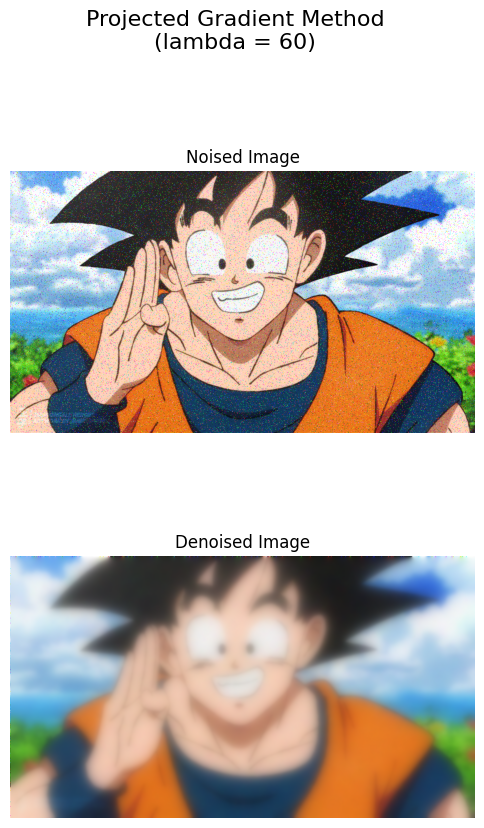

In [23]:
compute_optimization(60,times,results)

Lipschitz constant =  801
Optimizing red
Iter =  0
G_L =  24401758.81202021
Iter =  400
G_L =  555330.1773307127
Iter =  800
G_L =  238257.64856617132
Iter =  1200
G_L =  116594.84909545
Iter =  1600
G_L =  60332.79924925628
Iter =  2000
G_L =  32243.433097851906
Iter =  2400
G_L =  17607.65553552671
Iter =  2800
G_L =  9766.093960882356
Iter =  3200
G_L =  5480.561788005975
Iter =  3600
G_L =  3103.5648521215444
Iter =  4000
G_L =  1770.1128393384836
Iter =  4400
G_L =  1015.3998918641836
Iter =  4800
G_L =  585.2125026681252
Iter =  5200
G_L =  338.59737424049075
Iter =  5600
G_L =  196.55278444887702
Iter =  6000
G_L =  114.41700089617531
Iter =  6400
G_L =  66.76532497419463
Iter =  6800
G_L =  39.041482326871595
Iter =  7200
G_L =  22.872167000495395
Iter =  7600
G_L =  13.421591451920804
Iter =  8000
G_L =  7.887537948002727
Iter =  8400
G_L =  4.641481417418161
Iter =  8800
G_L =  2.7346134559128497
Iter =  9200
G_L =  1.612922804841245
Iter =  9600
G_L =  0.9522914392052401
Ite

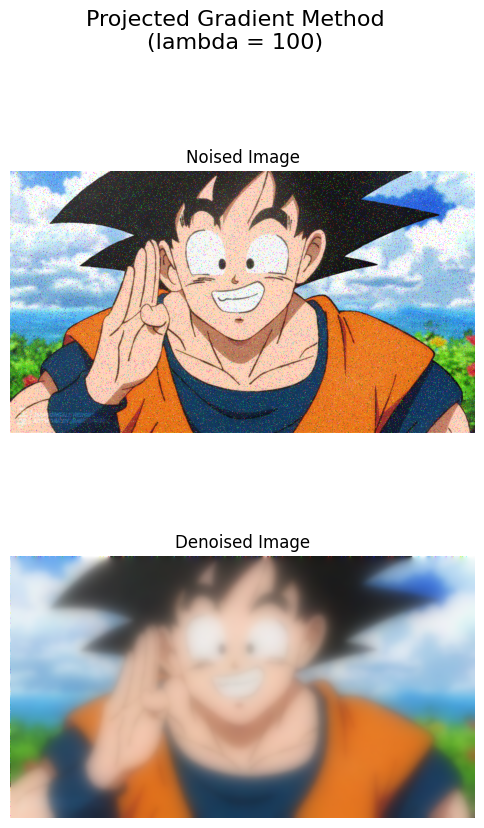

In [24]:
compute_optimization(100,times,results)

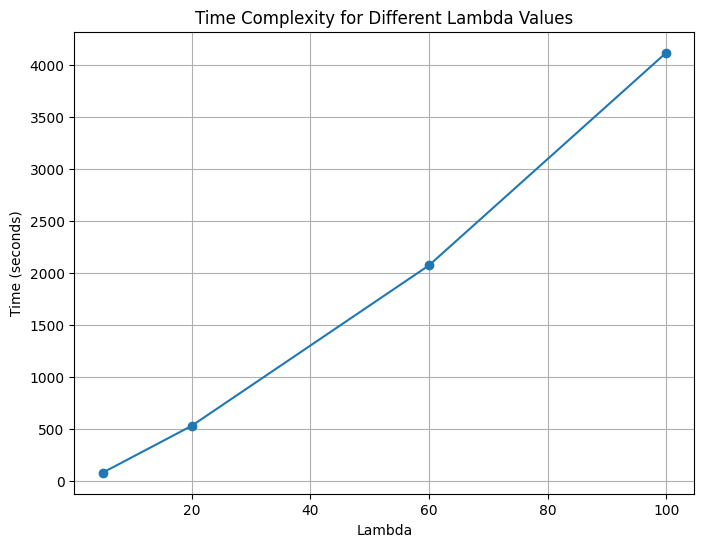

In [25]:
fig_time = plt.figure(figsize=(8, 6))
plt.plot(lmds, times, marker='o')
plt.title('Time Complexity for Different Lambda Values')
plt.xlabel('Lambda')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.savefig("Time_complexity.png")

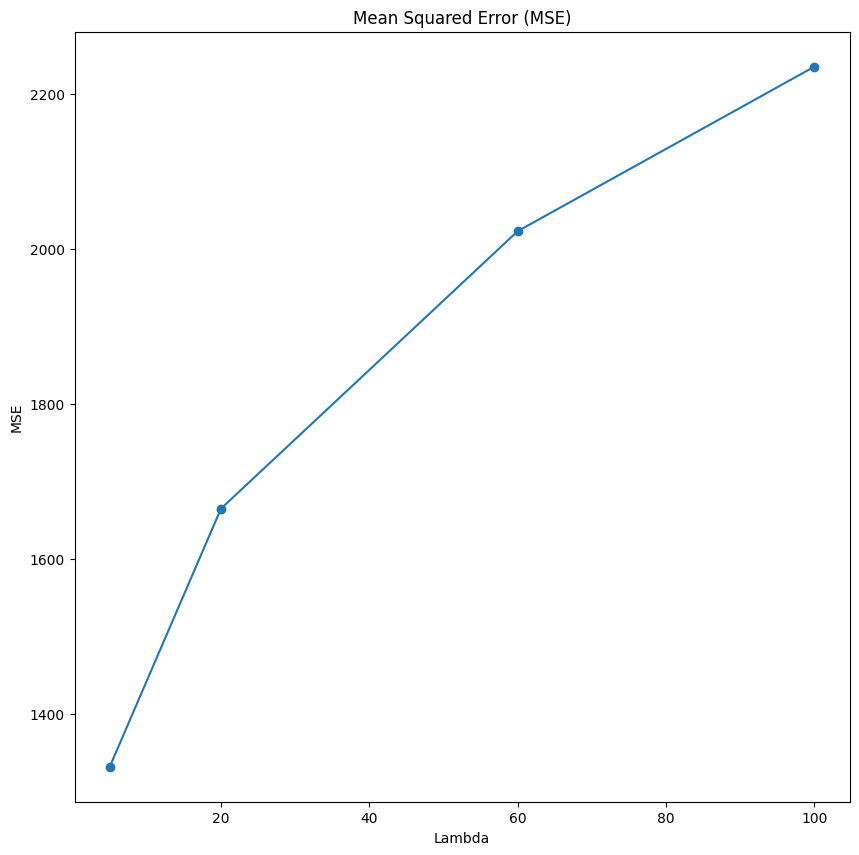

In [28]:
lmd_values = [x[0] for x in results]
mse_values = [x[1] for x in results]
# Plotting the metrics
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.plot(lmd_values, mse_values, marker='o', label='MSE')
ax.set_title('Mean Squared Error (MSE)')
ax.set_xlabel('Lambda')
ax.set_ylabel('MSE')

plt.savefig("metrics.png")
